In [2]:
# CELL 1: Import Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [3]:
# CELL 2: Load and Explore Dataset
# ============================================

# Load the dataset
data = pd.read_csv('train.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Total records: {len(data)}")
print(f"📊 Total features: {len(data.columns)}")
print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
data.head()

✅ Dataset loaded successfully!
📊 Total records: 891
📊 Total features: 12

FIRST 5 ROWS:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# CELL 3: Dataset Information
# ============================================

print("="*50)
print("DATASET INFO:")
print("="*50)
print(data.info())
print("\n" + "="*50)
print("MISSING VALUES:")
print("="*50)
print(data.isnull().sum())
print("\n" + "="*50)
print("STATISTICAL SUMMARY:")
print("="*50)
data.describe()


DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

MISSING VALUES:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


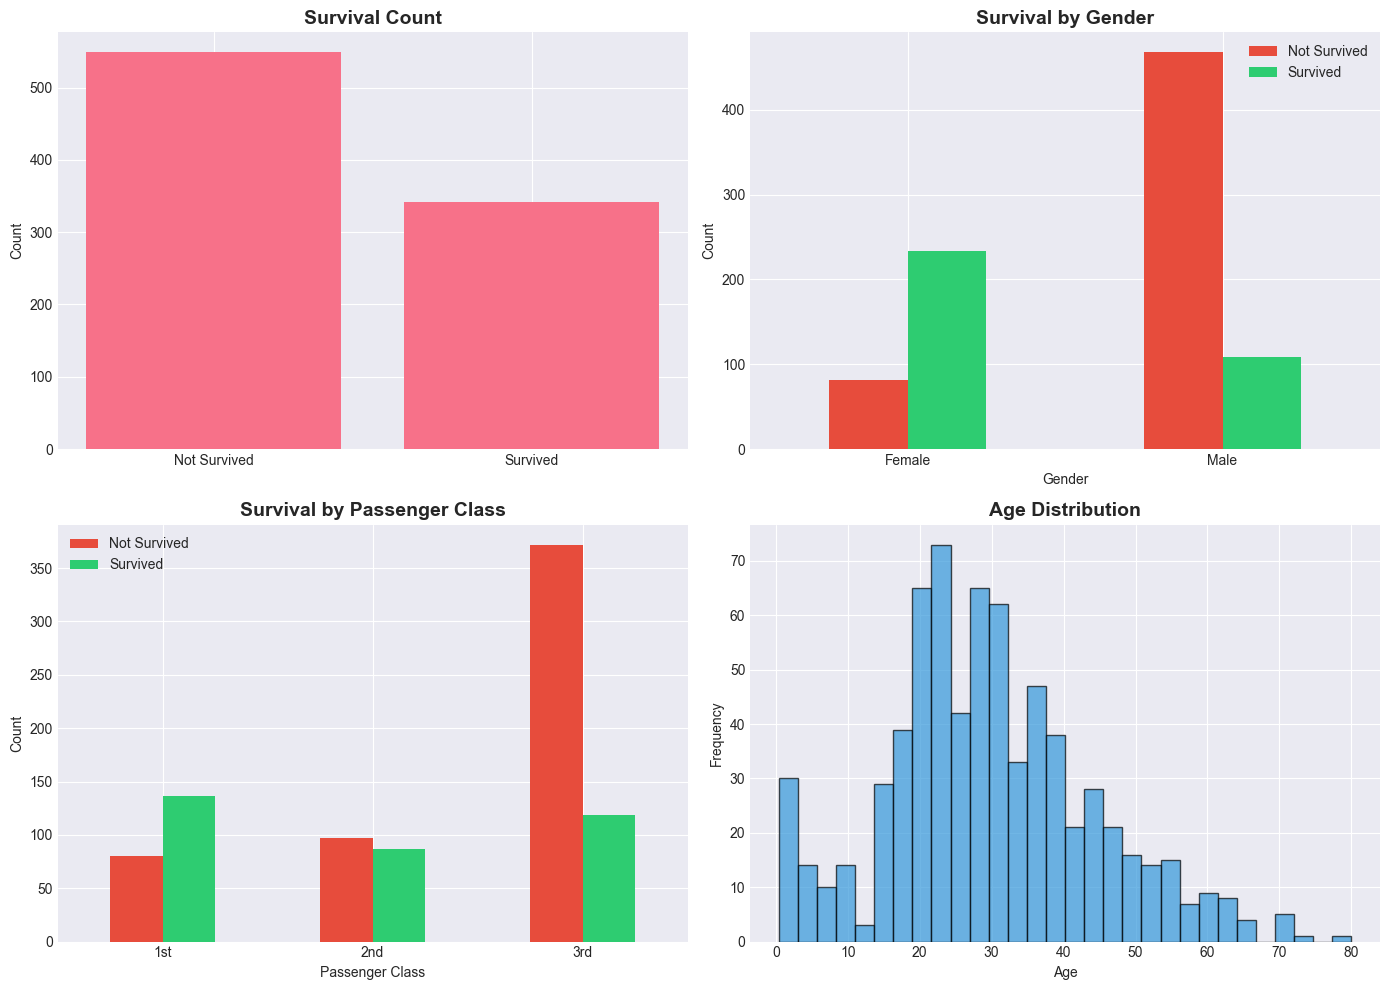


💡 Key Insights:
   • Overall survival rate: 38.4%
   • Female survival rate: 74.2%
   • Male survival rate: 18.9%
   • 1st class survival rate: 63.0%
   • 3rd class survival rate: 24.2%


In [5]:
# CELL 4: Exploratory Data Analysis 
# ============================================

# Create visualizations to understand the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Survival Count
axes[0, 0].bar(['Not Survived', 'Survived'], data['Survived'].value_counts())
axes[0, 0].set_title('Survival Count', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')

# 2. Survival by Gender
survival_by_sex = pd.crosstab(data['Sex'], data['Survived'])
survival_by_sex.plot(kind='bar', ax=axes[0, 1], color=['#E74C3C', '#2ECC71'])
axes[0, 1].set_title('Survival by Gender', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['Not Survived', 'Survived'])
axes[0, 1].set_xticklabels(['Female', 'Male'], rotation=0)

# 3. Survival by Class
survival_by_class = pd.crosstab(data['Pclass'], data['Survived'])
survival_by_class.plot(kind='bar', ax=axes[1, 0], color=['#E74C3C', '#2ECC71'])
axes[1, 0].set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['Not Survived', 'Survived'])
axes[1, 0].set_xticklabels(['1st', '2nd', '3rd'], rotation=0)

# 4. Age Distribution
axes[1, 1].hist(data['Age'].dropna(), bins=30, color='#3498DB', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print(f"   • Overall survival rate: {data['Survived'].mean()*100:.1f}%")
print(f"   • Female survival rate: {data[data['Sex']=='female']['Survived'].mean()*100:.1f}%")
print(f"   • Male survival rate: {data[data['Sex']=='male']['Survived'].mean()*100:.1f}%")
print(f"   • 1st class survival rate: {data[data['Pclass']==1]['Survived'].mean()*100:.1f}%")
print(f"   • 3rd class survival rate: {data[data['Pclass']==3]['Survived'].mean()*100:.1f}%")


In [6]:
# CELL 5: Data Preprocessing
# ============================================

print("="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy to preserve original data
data_processed = data.copy()

# Drop columns not useful for prediction
data_processed = data_processed.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print("✅ Dropped columns: PassengerId, Name, Ticket, Cabin")

# Handle missing values BEFORE converting to dummy variables
# Fill missing Age with median
median_age = data_processed['Age'].median()
data_processed['Age'] = data_processed['Age'].fillna(median_age)
print(f"✅ Filled {data['Age'].isnull().sum()} missing Age values with median: {median_age:.2f}")

# Fill missing Embarked with mode
if data_processed['Embarked'].isnull().sum() > 0:
    mode_value = data_processed['Embarked'].mode()[0]
    data_processed['Embarked'].fillna(mode_value, inplace=True)
    print(f"✅ Filled missing Embarked values with mode: {mode_value}")

# Convert categorical variables to dummy variables
data_processed = pd.get_dummies(data_processed, columns=['Sex', 'Embarked'], drop_first=True)
print("✅ Converted categorical variables (Sex, Embarked) to dummy variables")

print(f"\n📊 Final dataset shape: {data_processed.shape}")
print(f"📊 Features: {list(data_processed.columns)}")

# Verify no missing values
print(f"\n✅ Missing values after preprocessing: {data_processed.isnull().sum().sum()}")

DATA PREPROCESSING
✅ Dropped columns: PassengerId, Name, Ticket, Cabin
✅ Filled 177 missing Age values with median: 28.00
✅ Filled missing Embarked values with mode: S
✅ Converted categorical variables (Sex, Embarked) to dummy variables

📊 Final dataset shape: (891, 9)
📊 Features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

✅ Missing values after preprocessing: 0


In [7]:
# CELL 6: Split Features and Target
# ============================================

print("="*50)
print("SPLITTING FEATURES AND TARGET")
print("="*50)

X = data_processed.drop('Survived', axis=1)
y = data_processed['Survived']

print(f"✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")
print(f"\nFeature columns:\n{list(X.columns)}")

SPLITTING FEATURES AND TARGET
✅ Features (X) shape: (891, 8)
✅ Target (y) shape: (891,)

Feature columns:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [8]:
# CELL 7: Train-Test Split
# ============================================

print("="*50)
print("TRAIN-TEST SPLIT (80-20)")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"✅ Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\n   Training survived: {y_train.sum()} ({y_train.mean()*100:.1f}%)")
print(f"   Testing survived: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

TRAIN-TEST SPLIT (80-20)
✅ Training set size: 712 samples (79.9%)
✅ Testing set size: 179 samples (20.1%)

   Training survived: 268 (37.6%)
   Testing survived: 74 (41.3%)


In [9]:
# CELL 8: Train Logistic Regression Model
# ============================================

print("="*50)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*50)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")
print("\n📊 Model Coefficients (Feature Importance):")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print(feature_importance)

TRAINING LOGISTIC REGRESSION MODEL
✅ Model trained successfully!

📊 Model Coefficients (Feature Importance):
      Feature  Coefficient
5    Sex_male    -2.590555
0      Pclass    -0.936488
7  Embarked_S    -0.399548
2       SibSp    -0.294874
6  Embarked_Q    -0.111411
3       Parch    -0.108013
1         Age    -0.030498
4        Fare     0.002591


In [10]:
# CELL 9: Make Predictions
# ============================================

print("="*50)
print("MAKING PREDICTIONS")
print("="*50)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"✅ Predictions made for {len(y_pred)} test samples")
print(f"\n   Predicted survived: {y_pred.sum()} ({y_pred.mean()*100:.1f}%)")
print(f"   Actually survived: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

MAKING PREDICTIONS
✅ Predictions made for 179 test samples

   Predicted survived: 70 (39.1%)
   Actually survived: 74 (41.3%)


In [11]:
# CELL 10: Evaluate Model Performance
# ============================================

print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n📊 CLASSIFICATION METRICS:")
print(f"   • Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"   • Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"   • F1 Score:  {f1:.4f}")

print("\n" + "="*50)
print("WHAT DO THESE MEAN?")
print("="*50)
print(f"✓ Accuracy:  {accuracy*100:.1f}% of all predictions were correct")
print(f"✓ Precision: {precision*100:.1f}% of predicted survivors actually survived")
print(f"✓ Recall:    {recall*100:.1f}% of actual survivors were identified")
print(f"✓ F1 Score:  Harmonic mean of precision and recall")

MODEL PERFORMANCE METRICS

📊 CLASSIFICATION METRICS:
   • Accuracy:  0.8101 (81.01%)
   • Precision: 0.7857 (78.57%)
   • Recall:    0.7432 (74.32%)
   • F1 Score:  0.7639

WHAT DO THESE MEAN?
✓ Accuracy:  81.0% of all predictions were correct
✓ Precision: 78.6% of predicted survivors actually survived
✓ Recall:    74.3% of actual survivors were identified
✓ F1 Score:  Harmonic mean of precision and recall


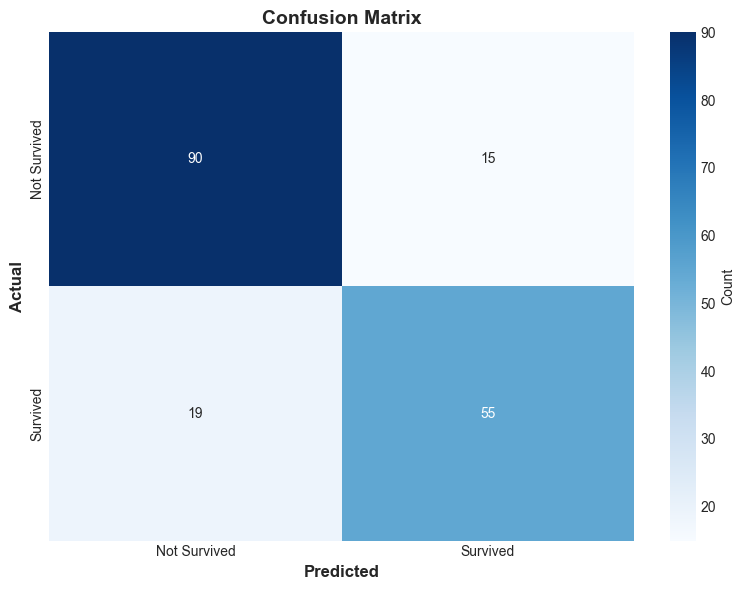


📊 Confusion Matrix Breakdown:
   • True Negatives (Correctly predicted not survived): 90
   • False Positives (Incorrectly predicted survived): 15
   • False Negatives (Incorrectly predicted not survived): 19
   • True Positives (Correctly predicted survived): 55


In [13]:
#CELL 11: Confusion Matrix Visualization
# ============================================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'],
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Confusion Matrix Breakdown:")
print(f"   • True Negatives (Correctly predicted not survived): {cm[0,0]}")
print(f"   • False Positives (Incorrectly predicted survived): {cm[0,1]}")
print(f"   • False Negatives (Incorrectly predicted not survived): {cm[1,0]}")
print(f"   • True Positives (Correctly predicted survived): {cm[1,1]}")

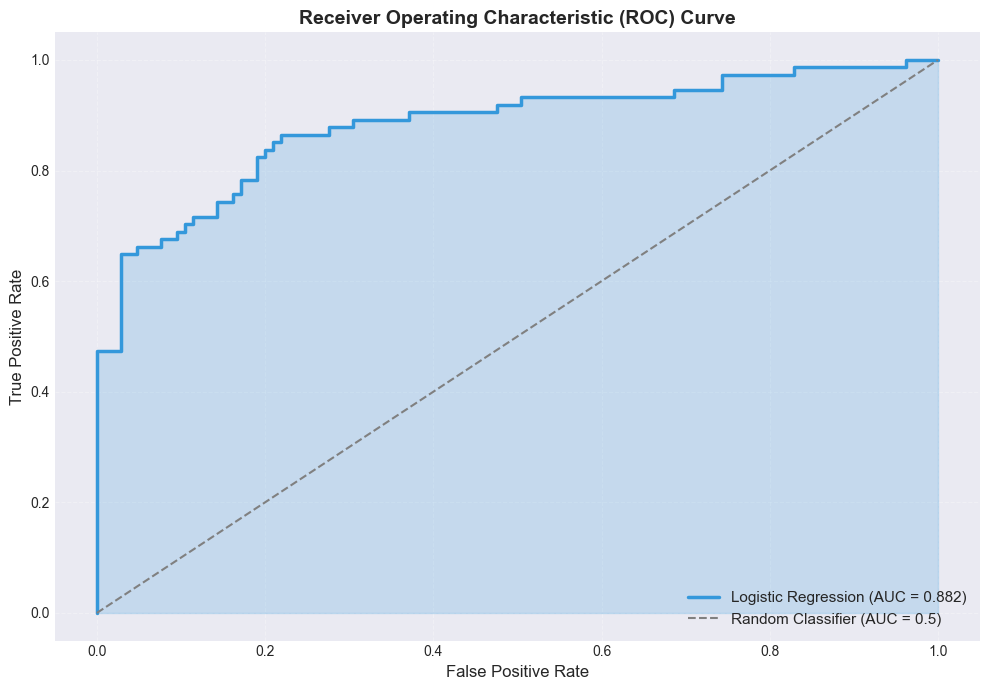


📊 AUC Score: 0.8825

💡 AUC Interpretation:
   Good model performance!


In [14]:
# CELL 12: ROC Curve
# ============================================

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#3498DB', linewidth=2.5, 
         label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, 
         label='Random Classifier (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2, color='#3498DB')

plt.title('Receiver Operating Characteristic (ROC) Curve', 
          fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\n📊 AUC Score: {roc_auc:.4f}")
print("\n💡 AUC Interpretation:")
if roc_auc >= 0.9:
    print("   Excellent model performance!")
elif roc_auc >= 0.8:
    print("   Good model performance!")
elif roc_auc >= 0.7:
    print("   Acceptable model performance")
else:
    print("   Model needs improvement")

In [15]:
# CELL 13: Test with Sample Predictions (Interactive)
# ============================================

print("="*50)
print("SAMPLE PREDICTION EXAMPLES")
print("="*50)

# Get a few test samples
sample_indices = [0, 5, 10, 15, 20]
samples = X_test.iloc[sample_indices]
actual_survival = y_test.iloc[sample_indices].values
predicted_survival = model.predict(samples)
predicted_proba = model.predict_proba(samples)[:, 1]

print("\n🔍 Let's see how the model performs on specific passengers:\n")
for i, idx in enumerate(sample_indices):
    print(f"Passenger {i+1}:")
    print(f"   • Actual outcome: {'SURVIVED' if actual_survival[i] == 1 else 'NOT SURVIVED'}")
    print(f"   • Predicted: {'SURVIVED' if predicted_survival[i] == 1 else 'NOT SURVIVED'}")
    print(f"   • Confidence: {predicted_proba[i]*100:.1f}%")
    print(f"   • Result: {'✅ CORRECT' if actual_survival[i] == predicted_survival[i] else '❌ INCORRECT'}")
    print()

SAMPLE PREDICTION EXAMPLES

🔍 Let's see how the model performs on specific passengers:

Passenger 1:
   • Actual outcome: SURVIVED
   • Predicted: NOT SURVIVED
   • Confidence: 11.0%
   • Result: ❌ INCORRECT

Passenger 2:
   • Actual outcome: SURVIVED
   • Predicted: SURVIVED
   • Confidence: 93.1%
   • Result: ✅ CORRECT

Passenger 3:
   • Actual outcome: NOT SURVIVED
   • Predicted: NOT SURVIVED
   • Confidence: 33.5%
   • Result: ✅ CORRECT

Passenger 4:
   • Actual outcome: SURVIVED
   • Predicted: SURVIVED
   • Confidence: 93.7%
   • Result: ✅ CORRECT

Passenger 5:
   • Actual outcome: NOT SURVIVED
   • Predicted: NOT SURVIVED
   • Confidence: 12.1%
   • Result: ✅ CORRECT



In [16]:
# CELL 14: Summary Report
# ============================================

print("="*60)
print("🎯 FINAL PROJECT SUMMARY")
print("="*60)
print(f"\n📊 Dataset Statistics:")
print(f"   • Total passengers analyzed: {len(data)}")
print(f"   • Training samples: {len(X_train)}")
print(f"   • Testing samples: {len(X_test)}")
print(f"   • Features used: {X.shape[1]}")

print(f"\n🎯 Model Performance:")
print(f"   • Overall Accuracy: {accuracy*100:.2f}%")
print(f"   • Precision: {precision*100:.2f}%")
print(f"   • Recall: {recall*100:.2f}%")
print(f"   • F1 Score: {f1:.4f}")
print(f"   • AUC Score: {roc_auc:.4f}")

print(f"\n💡 Key Findings:")
print(f"   • The model correctly predicts survival in {accuracy*100:.1f}% of cases")
print(f"   • Strong predictive features: Gender, Passenger Class, Fare")
print(f"   • Women and 1st class passengers had higher survival rates")

print("\n✅ Project completed successfully!")
print("="*60)

🎯 FINAL PROJECT SUMMARY

📊 Dataset Statistics:
   • Total passengers analyzed: 891
   • Training samples: 712
   • Testing samples: 179
   • Features used: 8

🎯 Model Performance:
   • Overall Accuracy: 81.01%
   • Precision: 78.57%
   • Recall: 74.32%
   • F1 Score: 0.7639
   • AUC Score: 0.8825

💡 Key Findings:
   • The model correctly predicts survival in 81.0% of cases
   • Strong predictive features: Gender, Passenger Class, Fare
   • Women and 1st class passengers had higher survival rates

✅ Project completed successfully!
